# Technocolabs Softwares : ML Tasks

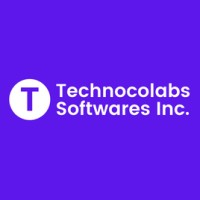

## Task 1 - SALES PREDICTION AND FORECASTING WITH MACHINE LEARNING

#### Problem Statement 
Build will assist BigMart in understanding the relationships between product attributes, store characteristics, and sales performance, ultimately aiding in the enhancement of sales strategies and profitability.

## Author : Mohamed Sherif El-Boraie

### Imported Libraries

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from sklearn.metrics import mean_absolute_error , r2_score,  mean_squared_error
from sklearn.model_selection import train_test_split ,GridSearchCV 

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler ,LabelEncoder, OneHotEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import  LinearRegression , Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb



# Import the matplotlib and seaborn libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly
import plotly.express as px

In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in cast")

### Load and Explore Dataset

In [4]:
dataset = pd.read_csv('D:/Mohamed Sheriff/Projects/Technocolabs Machine Learning Internship/First Project/Dataset/Train.csv')
dataset_test = pd.read_csv('D:/Mohamed Sheriff/Projects/Technocolabs Machine Learning Internship/First Project/Dataset/Test.csv')
# We are going to work on a copy of the dataset
df_test = dataset_test.copy() # Test Dataset
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [54]:
df = dataset.copy() # Train Dataset
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

**Brief description of each column in the dataset:**

- Item_Identifier: A unique identifier for each product.
- Item_Weight: The weight of the product.
- Item_Fat_Content: Indicates the fat content level of the product (e.g., "Low Fat" or "Regular").
- Item_Visibility: The percentage of total display area of all products in a store allocated to this product.
- Item_Type: The category of the product (e.g., "Dairy" or "Soft Drinks").
- Item_MRP: The Maximum Retail Price (MRP) of the product.
- Outlet_Identifier: A unique identifier for each store.
- Outlet_Establishment_Year: The year when the store was established.
- Outlet_Size: The size of the store (e.g., "Medium").
- Outlet_Location_Type: The type of location where the store is situated (e.g., "Tier 1").
- Outlet_Type: The type of outlet or store (e.g., "Supermarket Type1").
- Item_Outlet_Sales: The sales of the product in the respective outlet.

In [6]:
df.shape

(8523, 12)

In [8]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [9]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [10]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

- There are multiple representations for the 'Item_Fat_Content' column
- To make the data more consistent, I will consider mapping these values to a standard set of categories

In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [12]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [13]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [15]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [17]:
df = df.sort_values(by='Outlet_Establishment_Year')

In [18]:
# Remove the portion of the name 'Supermarket Type' so the outlet_type is shorter
df['Outlet_Type'] = df.Outlet_Type.str.replace('Supermarket Type', 'Supermarket ')
df['Outlet_Identifier'] = df.Outlet_Identifier.str.replace('OUT','')
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4338           FDH21          NaN          Low Fat         0.031074   
3689           FDD53          NaN          Low Fat         0.044008   
1139           FDH26          NaN          Regular         0.034532   
1138           FDM21          NaN          Low Fat         0.064052   
3691           FDY36          NaN          Low Fat         0.016477   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
4338       Seafood  157.5604               027                       1985   
3689  Frozen Foods   43.7454               027                       1985   
1139        Canned  142.2496               027                       1985   
1138   Snack Foods  256.1646               027                       1985   
3691  Baking Goods   74.3380               019                       1985   

     Outlet_Size Outlet_Location_Type    Outlet_Type  Item_Outlet_Sales  
4338      Medium               Tier 3  Supermarket 3          5704.5744  
3689      Medium               Tier 3  Supermarket 3           671.1264  
1139      Medium               Tier 3  Supermarket 3          2399.5432  
1138      Medium               Tier 3  Supermarket 3          7472.2734  
3691       Small               Tier 1  Grocery Store           146.4760

In [19]:
# Remove the portion of the name 'Supermarket Type' so the outlet_type is shorter
df_test['Outlet_Type'] = df_test.Outlet_Type.str.replace('Supermarket Type', 'Supermarket ')
df_test['Outlet_Identifier'] = df_test.Outlet_Identifier.str.replace('OUT','')


In [20]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 4338 to 7378
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [23]:
columns_to_describe = df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']]
round(columns_to_describe.describe(),2)

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
count      7060.00          8523.00   8523.00            8523.00
mean         12.86             0.07    140.99            2181.29
std           4.64             0.05     62.28            1706.50
min           4.56             0.00     31.29              33.29
25%           8.77             0.03     93.83             834.25
50%          12.60             0.05    143.01            1794.33
75%          16.85             0.09    185.64            3101.30
max          21.35             0.33    266.89           13086.96

In [24]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
numeric_cols = df.select_dtypes(exclude=['object']).columns

### Explantory Data Analysis - EDA

In [26]:
df.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

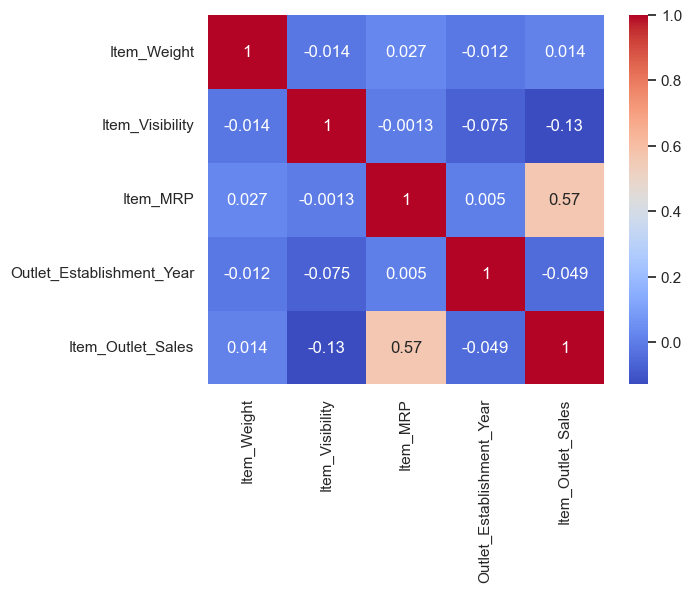

In [27]:
# Visualize the correlation between features
sns.set_context('notebook')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

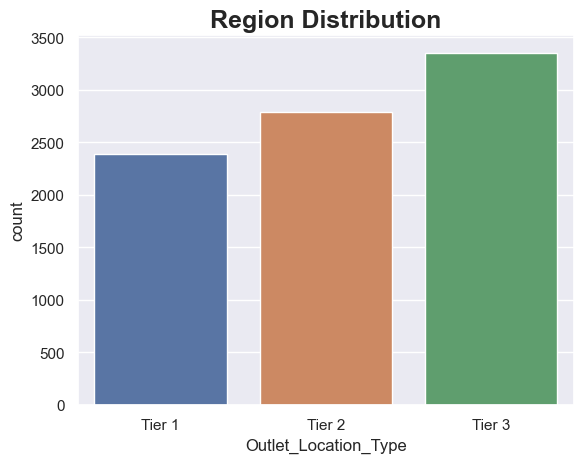

In [28]:
# Check the distribution of the Regions
sns.countplot(x='Outlet_Location_Type', data=df.sort_values(by='Outlet_Location_Type'))
plt.title("Region Distribution", fontweight='bold', fontsize = 18)
plt.show()

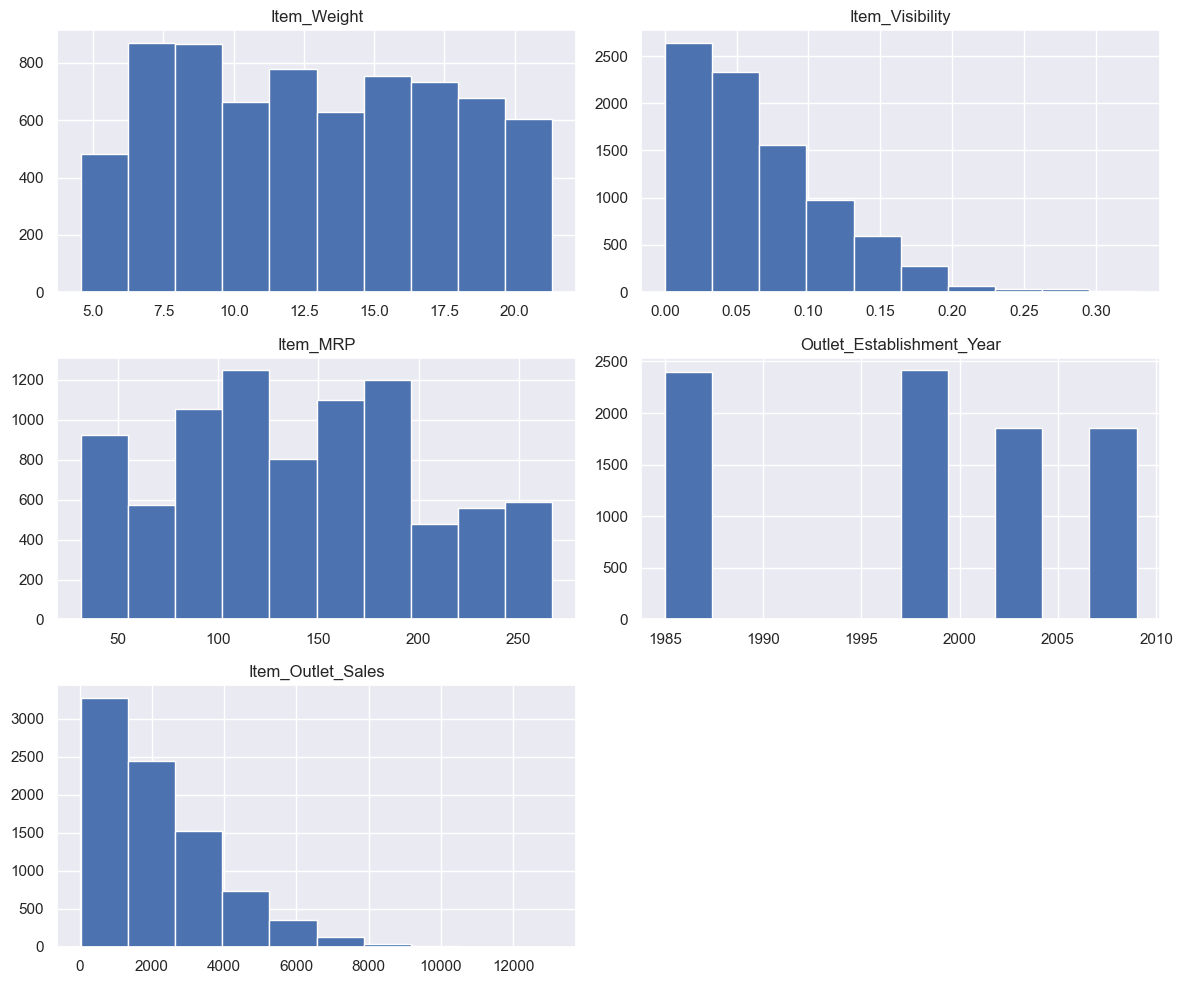

In [29]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [30]:
fig = px.box(df.sort_values(by=['Outlet_Establishment_Year','Item_Type']),
             x='Item_Type',y='Item_Outlet_Sales',
             animation_frame= 'Outlet_Establishment_Year',
             color='Item_Type',title='Items Sales')
fig.show()

In [31]:
fig = px.histogram(df.sort_values(by='Outlet_Establishment_Year'), 
                   x='Item_Fat_Content',
                   y='Item_Outlet_Sales',color='Item_Fat_Content',
                   title='Average Sales for different Fat Content Levels',
                   animation_frame= 'Outlet_Establishment_Year')
fig.show()

In [32]:
fig = px.scatter(df.sort_values(by=['Outlet_Establishment_Year']),
             x='Item_MRP',y='Item_Outlet_Sales',
             animation_frame= 'Outlet_Establishment_Year',
             color='Item_MRP',title='Correlation between product price (MRP) and sales')
fig.show()

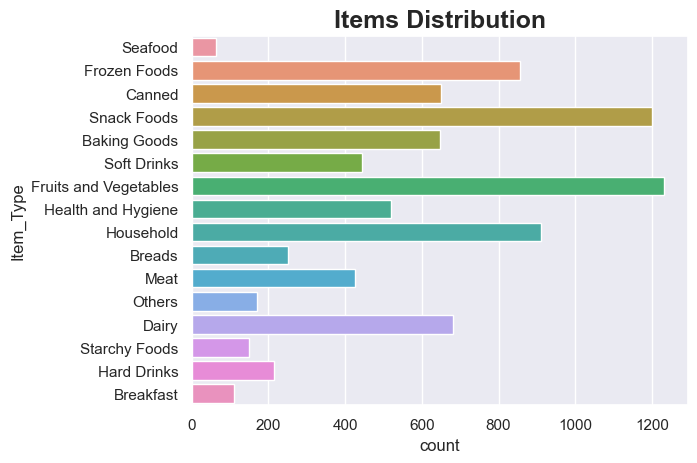

In [33]:
sns.countplot(y='Item_Type',data=df)
plt.title("Items Distribution", fontweight='bold',fontsize = 18)
plt.show()

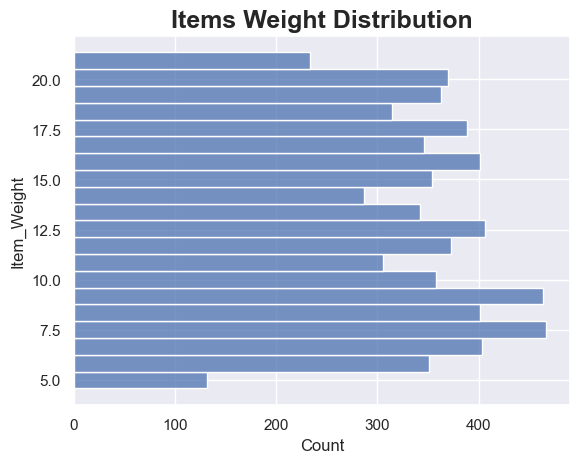

In [34]:
sns.histplot(y='Item_Weight',data=df)
plt.title("Items Weight Distribution", fontweight='bold',fontsize = 18)
plt.show()

In [35]:
# Impute missing values in 'Item_Weight' with the mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [36]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

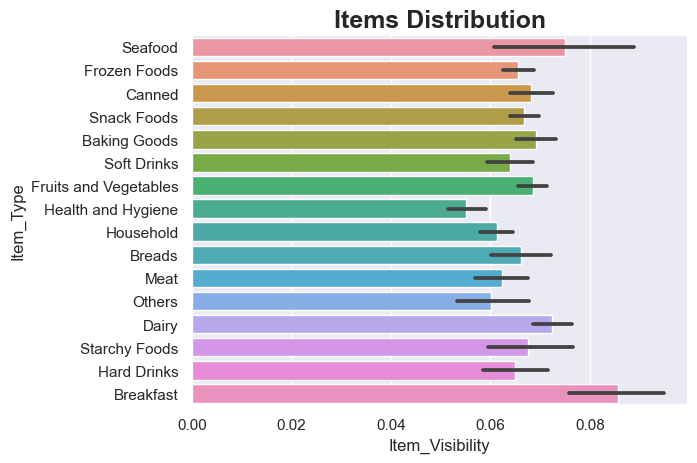

In [37]:
sns.barplot(x='Item_Visibility',y='Item_Type',data=df)
plt.title("Items Distribution", fontweight='bold',fontsize = 18)
plt.show()

In [38]:
fig = px.sunburst(df, 
            path=['Outlet_Location_Type','Outlet_Type'], 
            values='Item_Outlet_Sales',
            title='Sales for each market within different Tiers from 1985 till 2009'
)
fig.show()

In [39]:
fig = px.histogram(df.sort_values(by=['Item_Outlet_Sales']), 
                   x='Outlet_Identifier',
                   y='Item_Outlet_Sales',color='Outlet_Identifier',
                   title='Average Sales for Each store',
                   )
fig.show()

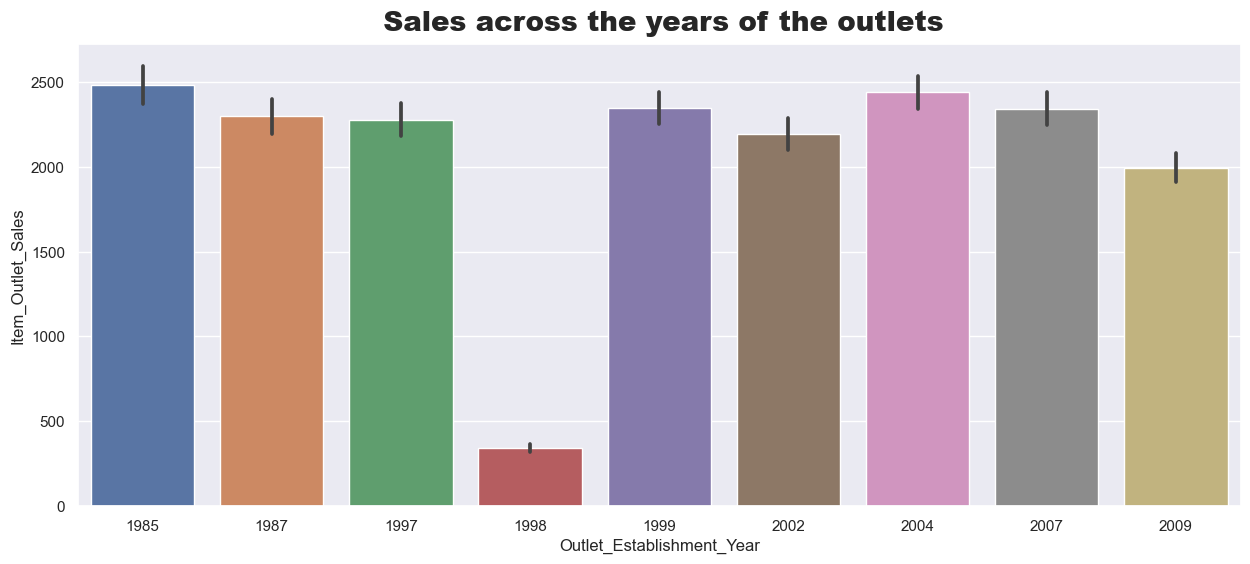

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(df, x='Outlet_Establishment_Year',y='Item_Outlet_Sales')
plt.title(" Sales across the years of the outlets",fontweight="black",fontsize=20,pad=10)
plt.show()

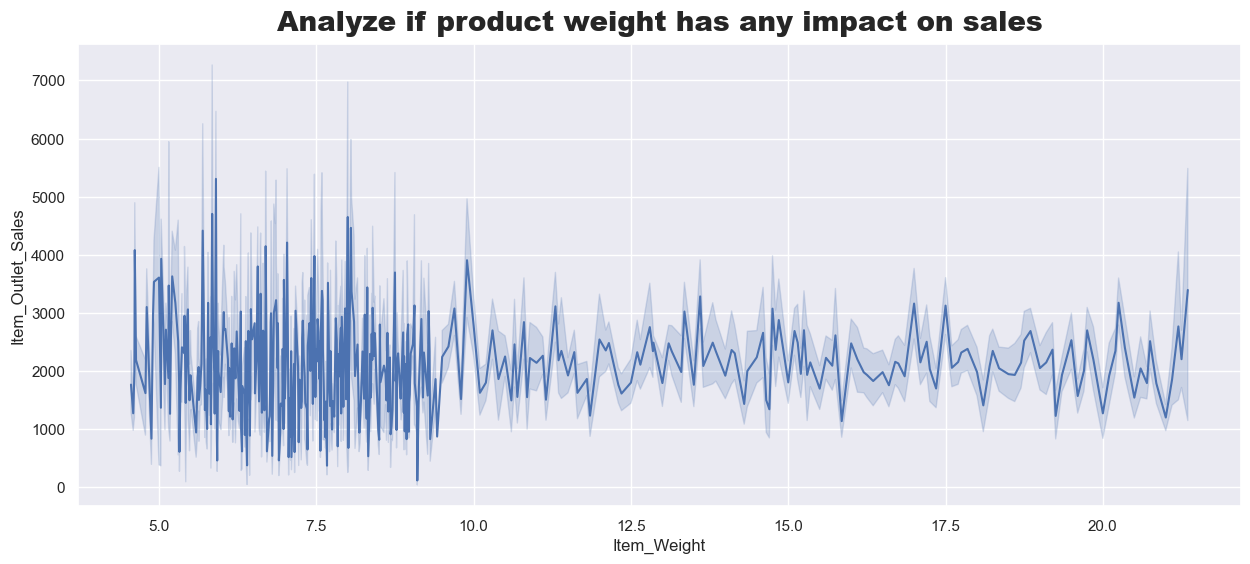

In [41]:
plt.figure(figsize=(15,6))
sns.lineplot(df, x='Item_Weight',y='Item_Outlet_Sales')
plt.title("Analyze if product weight has any impact on sales",fontweight="black",fontsize=20,pad=10)
plt.show()

Weight is not related to Item Sales

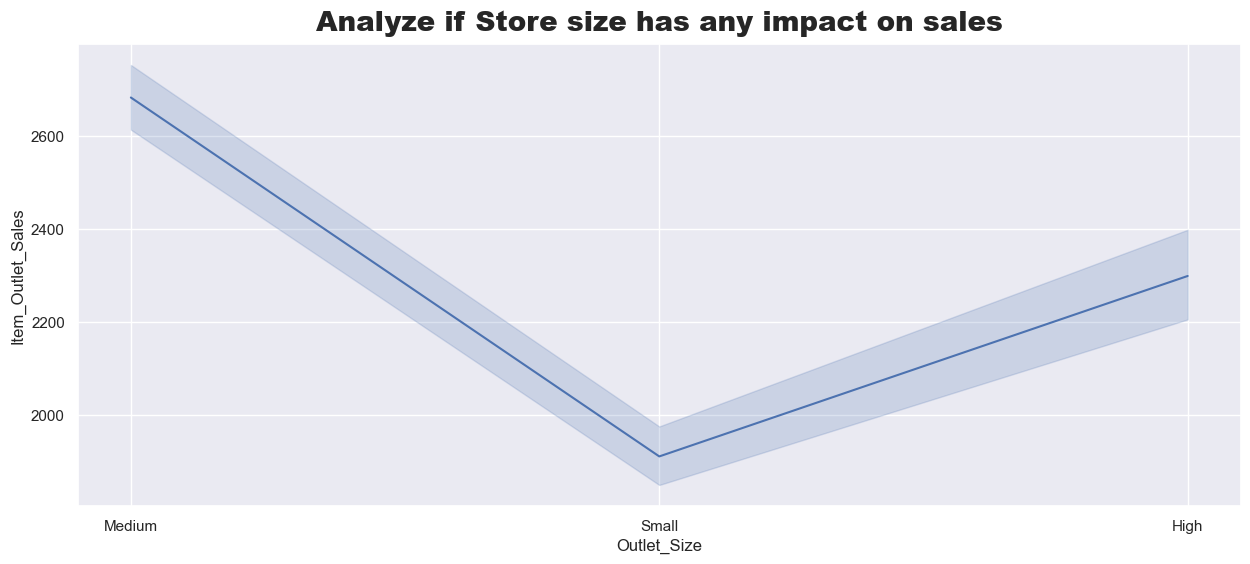

In [42]:
plt.figure(figsize=(15,6))
sns.lineplot(df, x='Outlet_Size',y='Item_Outlet_Sales')
plt.title("Analyze if Store size has any impact on sales",fontweight="black",fontsize=20,pad=10)
plt.show()

Store Size is related to Item Sales

In [43]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

As we have 2410 null value, we are going to drop na values
 impute the missing values with the mode, mean , median would affect the dataset as they not equally distributed

In [44]:
# Drop rows where 'Outlet_Size' is NaN
df.dropna(subset=['Outlet_Size'], inplace=True)

In [45]:
df_test.dropna(subset=['Outlet_Size'], inplace=True)

In [46]:
grouped_sales = df.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].mean().reset_index()

fig = px.bar(grouped_sales, x='Outlet_Location_Type', y='Item_Outlet_Sales',
             color='Outlet_Type', title='Average Sales by Location and Outlet Type',
            )
fig.show()

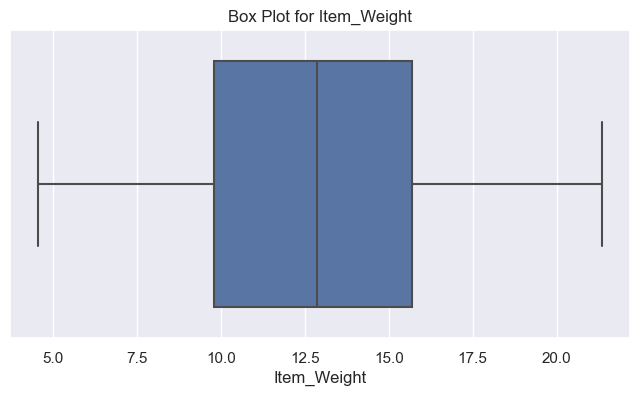

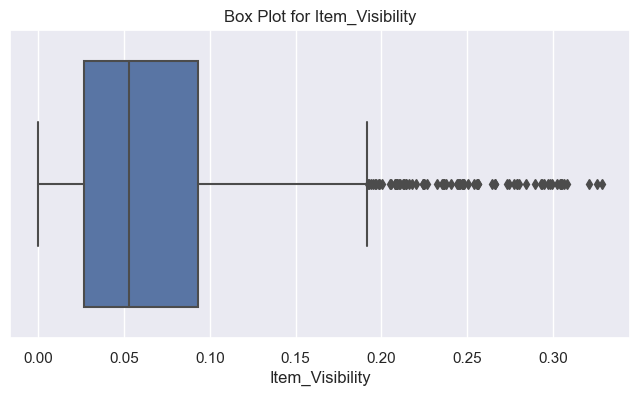

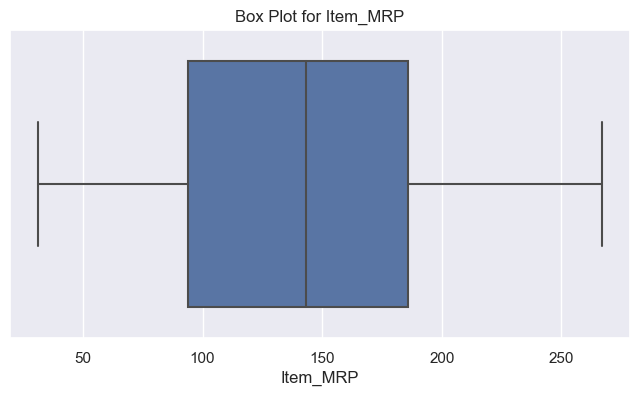

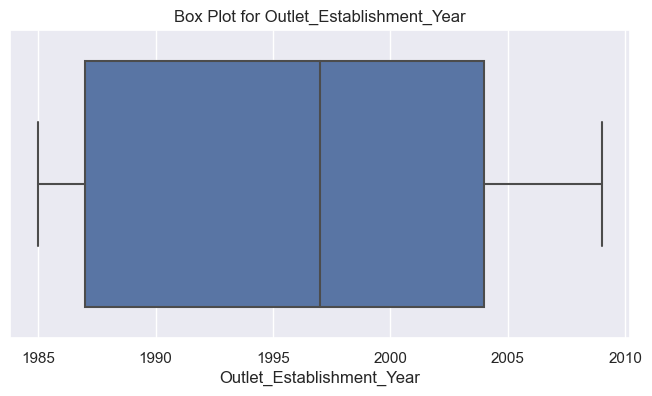

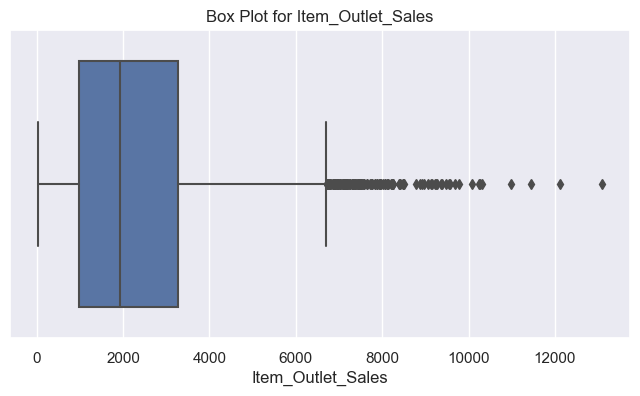

In [47]:
for column in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

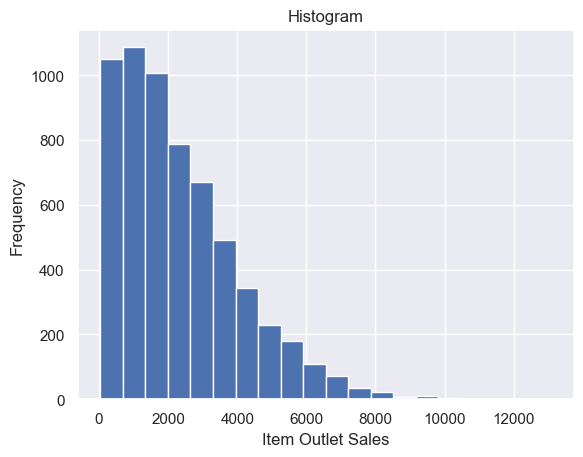

In [48]:
# Visual inspection of a histogram
plt.hist(df['Item_Outlet_Sales'], bins=20)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

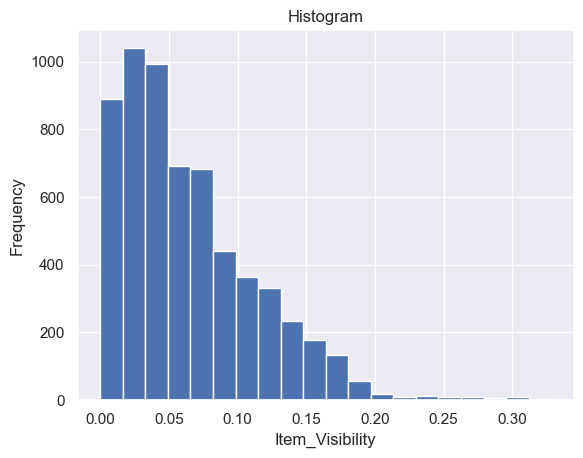

In [49]:
# Visual inspection of a histogram
plt.hist(df['Item_Visibility'], bins=20)
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

#### Hypothesis Generation:
1) Significant increase of Sales Items within time 
2) Items labeled as 'Low Fat' have higher sales compared to 'Regular' items.  
3) The location of the store (e.g., Tier 1, Tier 2, Tier 3 cities) affects the sales performance.
4) The type of store (e.g., Supermarket Type1, Supermarket Type2, Grocery Store) influences sales.
5) Items with higher visibility have higher sales.
6) The size of the store correlates with its sales as Larger stores may have more shelf space and product variety
7) Older stores have lower sales compared to newer ones

### Encoding Process

In [50]:
label_encoder = LabelEncoder()
df['Item_Fat_Content_LabelEncoded'] = label_encoder.fit_transform(df['Item_Fat_Content'])
df['OutletSize_LabelEncoded'] = label_encoder.fit_transform(df['Outlet_Size'])
df['Tier Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])

df = pd.get_dummies(df, columns=['Item_Type', 'Outlet_Type'], drop_first=True)

# After label encoding, remove the original categorical columns
df.drop(columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'], inplace=True)

In [51]:
label_encoder = LabelEncoder()
df_test['Item_Fat_Content_LabelEncoded'] = label_encoder.fit_transform(df_test['Item_Fat_Content'])
df_test['OutletSize_LabelEncoded'] = label_encoder.fit_transform(df_test['Outlet_Size'])
df_test['Tier Type'] = label_encoder.fit_transform(df_test['Outlet_Location_Type'])

df_test = pd.get_dummies(df_test, columns=['Item_Type', 'Outlet_Type'], drop_first=True)

# After label encoding, remove the original categorical columns
df_test.drop(columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'], inplace=True)

In [52]:
df.head(20)

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
4338           FDH21    12.857645         0.031074  157.5604   
3689           FDD53    12.857645         0.044008   43.7454   
1139           FDH26    12.857645         0.034532  142.2496   
1138           FDM21    12.857645         0.064052  256.1646   
3691           FDY36    12.857645         0.016477   74.3380   
1136           FDT46    12.857645         0.030658   50.5008   
7478           DRF37    12.857645         0.000000  261.2910   
1134           FDJ02    12.857645         0.044064  147.2418   
1131           FDL02    12.857645         0.182237  107.1622   
1130           FDY52    12.857645         0.012866   59.3536   
1129           FDA49    12.857645         0.113670   89.0198   
3107           FDK20    12.857645         0.000000  120.5072   
1127           NCM05    12.857645         0.059557  263.7226   
7485           FDI28    12.857645         0.026194   79.0302   
7487           NCS17    12.857645         0.080112   94.6436   
6484           NCS06    12.857645         0.031583  260.9910   
7498           FDX32    12.857645         0.174839  142.8786   
6483           FDA36    12.857645         0.009921  183.6924   
4957           NCR30    12.857645         0.124300   73.4696   
4954           FDU52    12.857645         0.063462  157.5630   

     Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
4338               027                       1985          5704.5744   
3689               027                       1985           671.1264   
1139               027                       1985          2399.5432   
1138               027                       1985          7472.2734   
3691               019                       1985           146.4760   
1136               027                       1985          1012.0160   
7478               019                       1985           788.9730   
1134               019                       1985           294.2836   
1131               019                       1985           211.7244   
1130               019                       1985           122.5072   
1129               019                       1985           174.4396   
3107               027                       1985          2695.1584   
1127               027                       1985          6872.3876   
7485               027                       1985          1901.5248   
7487               027                       1985          4065.3748   
6484               027                       1985          7100.7570   
7498               019                       1985           433.4358   
6483               019                       1985           555.2772   
4957               019                       1985           298.2784   
4954               027                       1985          1721.0930   

      Item_Fat_Content_LabelEncoded  OutletSize_LabelEncoded  Tier Type  \
4338                              0                        1          2   
3689                              0                        1          2   
1139                              1                        1          2   
1138                              0                        1          2   
3691                              0                        2          0   
1136                              0                        1          2   
7478                              0                        2          0   
1134                              1                        2          0   
1131                              1                        2          0   
1130                              0                        2          0   
1129                              0                        2          0   
3107                              1                        1          2   
1127                              0                        1          2   
7485                              0                        1          2   
7487                  

In [53]:
df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)
df_test.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

### Train Test Split

In [58]:
inputs = df.drop(['Item_Outlet_Sales'], axis=1) 
target = df['Item_Outlet_Sales']

In [59]:
#Perform train-test split to create a separate validation set for evaluating your model's performance. 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

In [60]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Define the models and their respective parameter grids for hyperparameter tuning

    models = {
        'Linear Regression': (LinearRegression(), {}),
        'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10],'min_samples_leaf': [1,5,10]}),
        'XGBoost': (xgb.XGBRegressor(), {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}),
        'Lasso' : (Lasso(), {'alpha': [0.01, 0.1, 1, 10]}), 
        'Ridge' : (Ridge(), {'alpha': [0.01, 0.1, 1, 10]}),
        'Neural Network': (MLPRegressor(), {'hidden_layer_sizes': [(50, 50), (20, 20, 20)], 'solver': ['adam']})
    }
    for model_name, (model, param_grid) in models.items():
        print(f"Training and evaluating {model_name}")

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
        grid_search.fit(X_train, y_train)  # Use the scaled features

        best_model = grid_search.best_estimator_

        # Evaluation on testing data
        y_test_pred = best_model.predict(X_test)  # Predict using scaled features
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)  # Add R-squared (R2) score

        print(f"--- {model_name} ---")
        print("Testing Data:")
        print(f"Mean Absolute Error: {test_mae}")
        print(f"Root Mean Squared Error: {test_rmse}")
        print(f"R-squared (R2) Score: {test_r2}")  # Print R2 score

        # Plot predicted vs. actual prices
        plt.figure()
        plt.scatter(y_test, y_test_pred)
        plt.title(f"Predicted vs. Actual Prices - {model_name}")
        plt.xlabel("Actual Price")
        plt.ylabel("Predicted Price")
        plt.show()   

        print(f"Best Model:{best_model}")

        print("-------------------------------\n")

Training and evaluating Linear Regression
--- Linear Regression ---
Testing Data:
Mean Absolute Error: 874.0594382147843
Root Mean Squared Error: 1176.8269592217096
R-squared (R2) Score: 0.5741322306307859


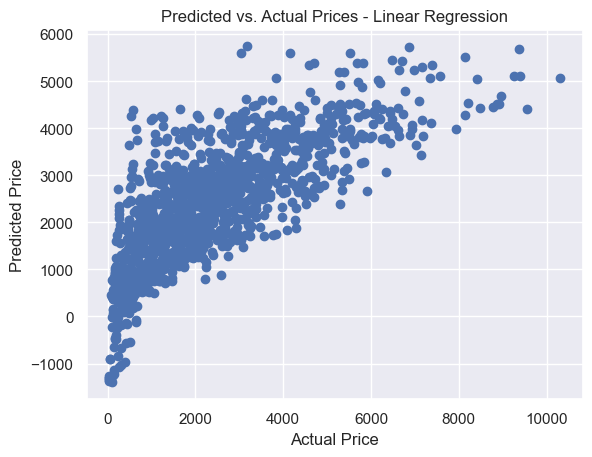

Best Model:LinearRegression()
-------------------------------

Training and evaluating Random Forest
--- Random Forest ---
Testing Data:
Mean Absolute Error: 813.2295055062039
Root Mean Squared Error: 1135.439336327065
R-squared (R2) Score: 0.6035600368393992


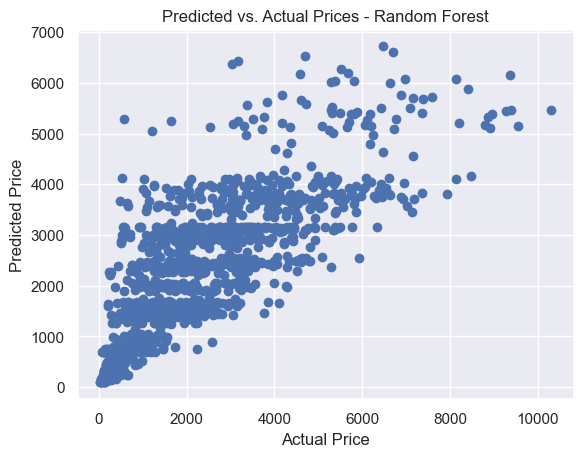

Best Model:RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=300)
-------------------------------

Training and evaluating XGBoost
--- XGBoost ---
Testing Data:
Mean Absolute Error: 823.0583446844362
Root Mean Squared Error: 1138.9544683727013
R-squared (R2) Score: 0.6011016124099096


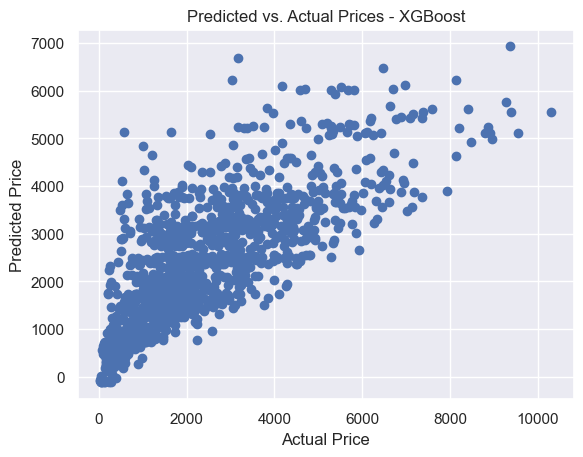

Best Model:XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
-------------------------------

Training and evaluating Lasso
--- Lasso ---
Testing Data:
Mean Absolute Error: 876.5244115542914
Root Mean Squared Error: 1181.5386281327555
R-squared (R2) Score: 0.5707153056067968


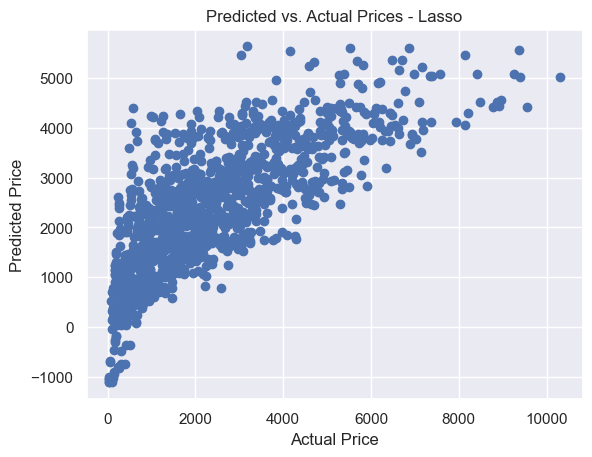

Best Model:Lasso(alpha=10)
-------------------------------

Training and evaluating Ridge
--- Ridge ---
Testing Data:
Mean Absolute Error: 874.1396873875995
Root Mean Squared Error: 1177.016155612035
R-squared (R2) Score: 0.5739952876064102


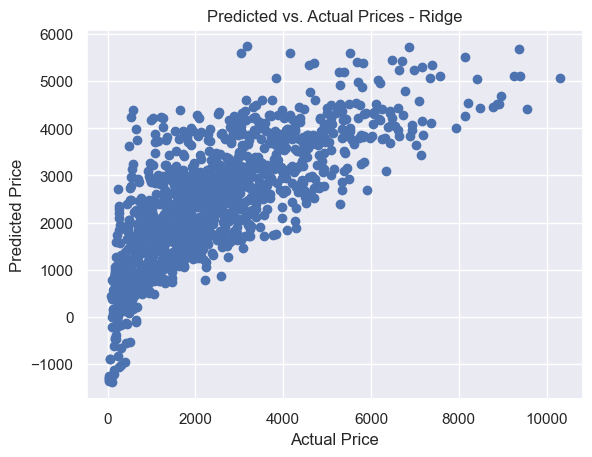

Best Model:Ridge(alpha=1)
-------------------------------

Training and evaluating Neural Network
--- Neural Network ---
Testing Data:
Mean Absolute Error: 999.8074834105265
Root Mean Squared Error: 1357.3545965683634
R-squared (R2) Score: 0.43345267773855234


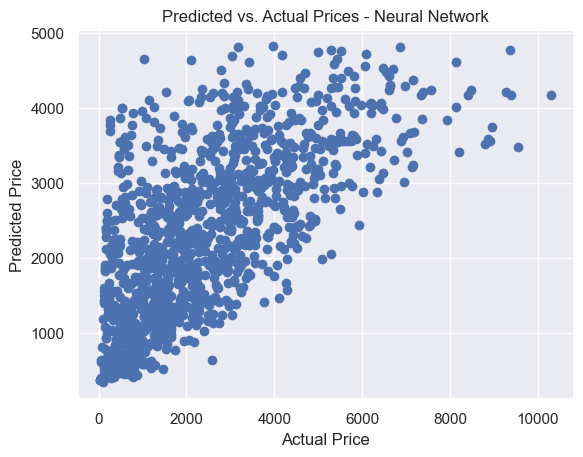

Best Model:MLPRegressor(hidden_layer_sizes=(50, 50))
-------------------------------



In [61]:
train_and_evaluate_models(x_train, x_test, y_train, y_test)

In [62]:
results = {
    'Algorithm': [],
    'R2 Score': [],
    'Mean Absolute Error': [],
    'Root Mean Squared Error': [],
    'Best Model': []
}


results['Algorithm'].extend([
    'Linear Regression','Random Forest Regressor', 
    'XGBoost', 'Lasso', 'Ridge', 'Neural Network Regressor'
])


results['Mean Absolute Error'].extend([
    874.05, 813.22, 823.05, 
    876.52, 874.13, 999.80
])
results['Root Mean Squared Error'].extend([
    1176.82, 1135.43, 1138.95, 
    2485.61, 1177.01, 5638.28
])

results['R2 Score'].extend([
    0.57, 0.60, 0.60,
    0.57, 0.57, 0.43
])

results['Best Model'].extend([
    'LinearRegression()', 
    'RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=300)',
    'XGBRegressor( learning_rate=0.1,max_depth=3, n_estimators=100)',
    'Lasso(alpha=10)', 
    'Ridge(alpha=1)', 
    'MLPRegressor(hidden_layer_sizes=(50, 50))'
])

In [64]:
# Create a DataFrame
results_df = pd.DataFrame(results)
pd.options.display.float_format = '{:.2f}'.format


In [66]:
# Display the DataFrame
results_df.sort_values(by='Mean Absolute Error', ascending=True)

Algorithm  R2 Score  Mean Absolute Error  \
1   Random Forest Regressor      0.60               813.22   
2                   XGBoost      0.60               823.05   
0         Linear Regression      0.57               874.05   
4                     Ridge      0.57               874.13   
3                     Lasso      0.57               876.52   
5  Neural Network Regressor      0.43               999.80   

   Root Mean Squared Error                                         Best Model  
1                  1135.43  RandomForestRegressor(max_depth=5, min_samples...  
2                  1138.95  XGBRegressor( learning_rate=0.1,max_depth=3, n...  
0                  1176.82                                 LinearRegression()  
4                  1177.01                                     Ridge(alpha=1)  
3                  2485.61                                    Lasso(alpha=10)  
5                  5638.28          MLPRegressor(hidden_layer_sizes=(50, 50))

Random Forest Regressor model has the highest R2 score and relatively lower Mean Absolute Error and Root Mean Squared Error compared to the other models. A higher R2 score indicates better predictive performance, and lower Mean Absolute Error and Root Mean Squared Error suggest better accuracy and precision in the predictions.

### Save Model

In [81]:
# Import necessary libraries for saving the model
import joblib
import h5py

In [79]:
best_model = RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=300)

pkl_file_path = 'D:/Mohamed Sheriff/Projects/Technocolabs Machine Learning Internship/First Project/Model/best_model.pkl'

# Save the model as a pickle file
with open(pkl_file_path, 'wb') as pkl_file:
    pickle.dump(best_model, pkl_file)

In [83]:
h5_file_path = 'D:/Mohamed Sheriff/Projects/Technocolabs Machine Learning Internship/First Project/Model/best_model.h5'


# Save the model as a h5 file using joblib
joblib.dump(best_model, h5_file_path)

['D:/Mohamed Sheriff/Projects/Technocolabs Machine Learning Internship/First Project/Model/best_model.h5']

### Load and Test Model

In [86]:
loaded_model = joblib.load('D:/Mohamed Sheriff/Projects/Technocolabs Machine Learning Internship/First Project/Model/best_model.pkl')

In [ ]:
# Make predictions using the loaded model
predictions = loaded_model.predict(df_test)

print(predictions)